### Multiple metrics analysis

We will define multiple metrics and anlysi them individually

- Enrollment rate
- Average Reading Duration
- Average classroom Time
- Completion rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv("course_page_actions.csv")
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [3]:
df.action.value_counts()

view      3260
enroll     814
Name: action, dtype: int64

### Hypothesis test

$$ H_0: \pi_{new} - \pi_{old} \leqslant 0$$
 
$$ H_1: \pi_{new} - \pi_{old} > 0$$

### Control group

In [36]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')
# Get the enrollment rate in the control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

In [37]:
control_ctr

0.2364438839848676

### Experiment group

In [38]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')
# Get the enrollment rate in the experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

In [39]:
experiment_ctr

0.2668693009118541

In [40]:
obs_diff = experiment_ctr - control_ctr

In [41]:
obs_diff

0.030425416926986526

### Observed statistics 

In [20]:
print('The observed statistics for the control and experiment group: {} %'.format(obs_diff*100))

The observed statistics for the control and experiment group: 3.0425416926986526 %


### P-value test

In [26]:
# Bootstrap
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

In [27]:
std_diffs = np.std(diffs)

In [28]:
std_diffs

0.014904404209766955

### Simulation the distribtion

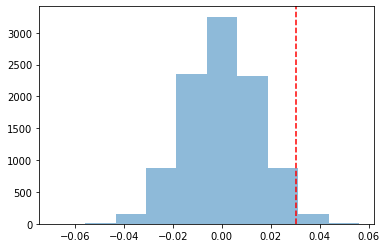

In [31]:
null_vals = np.random.normal(0, std_diffs, len(diffs))
plt.hist(null_vals, alpha=0.5)
plt.axvline(x=obs_diff, ls='dashed', c='r')

### P-value


In [42]:
(null_vals > obs_diff).mean()

0.0199

### Conclusion

**As we can see, the p-value is less than 5%, we would like to conclude that, there is statistical difference here**